In [13]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [4]:
apps = pd.read_csv('C:/Users/13612/Desktop/School/Assignments/Module 8/Lesson 4/NEWgoogleplaystore/NEWgoogleplaystore.csv')

In [5]:
categories = ['BEAUTY', 'FOOD_AND_DRINK', 'PHOTOGRAPHY']
apps1 = apps['Category'].isin(categories)
apps2 = apps[apps1].copy()

In [6]:
apps3 = apps2[['Category', 'Reviews']]

In [7]:
apps3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 98 to 10740
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  515 non-null    object
 1   Reviews   515 non-null    object
dtypes: object(2)
memory usage: 12.1+ KB


In [8]:
apps3.Reviews = apps3.Reviews.astype(int)

C:\tools\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
apps3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 98 to 10740
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  515 non-null    object
 1   Reviews   515 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 10.1+ KB


In [10]:
def recode (series):
    if series == 'BEAUTY':
        return 0
    if series == 'FOOD_AND_DRINK':
        return 1
    if series == 'PHOTOGRAPHY':
        return 2

apps3['CategoryR'] = apps3['Category'].apply(recode)

<ipython-input-10-ef569d1a185a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps3['CategoryR'] = apps3['Category'].apply(recode)


In [11]:
apps4 = apps3[['CategoryR', 'Reviews']]

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

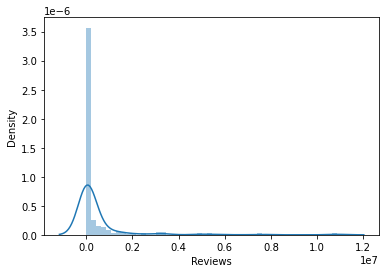

In [14]:
sns.distplot(apps4['Reviews'])

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ReviewSQRT', ylabel='Density'>

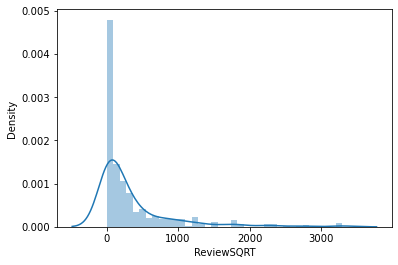

In [15]:
apps4['ReviewSQRT'] = np.sqrt(apps4['Reviews'])
sns.distplot(apps4['ReviewSQRT'])

In [17]:
scipy.stats.bartlett(apps4['ReviewSQRT'], apps4['CategoryR'])

BartlettResult(statistic=6187.981817647605, pvalue=0.0)

In [19]:
scipy.stats.fligner(apps4['ReviewSQRT'], apps4['CategoryR'])

FlignerResult(statistic=642.0602581715318, pvalue=1.1908711834100128e-141)

In [20]:
stats.f_oneway(apps['Reviews'][apps['Category']=='BEAUTY'],
              apps['Reviews'][apps['Category']=='FOOD_AND_DRINK'],
              apps['Reviews'][apps['Category']=='PHOTOGRAPHY'])

F_onewayResult(statistic=11.467490725511773, pvalue=1.342932747373518e-05)

In [21]:
postHoc = MultiComparison(apps4['ReviewSQRT'], apps4['CategoryR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1   111.89 0.4078 -93.3166 317.0966  False
     0      2  419.474  0.001 233.9713 604.9768   True
     1      2  307.584  0.001  176.819 438.3491   True
------------------------------------------------------


In [22]:
apps4.groupby('CategoryR').mean()

Reviews  ReviewSQRT
CategoryR                           
0            7476.226415   48.854024
1           69947.480315  160.744038
2          637363.134328  468.328067